# Random Forest Project - LendingClub.com

The aim of this project is to provide an example of machine learning prediction of a binary outcome using Random Decision Forests. A [publicly available dataset](https://www.lendingclub.com/info/download-data.action) from [LendingClub.com](www.lendingclub.com), comprising data from 2007 to 2010 is used as the data source. Lending Club is a peer-to-peer lending platform that connects borrowers with investors. Since an investor will be intested in knowing which borrowers will have the highest change of paying back the debt, a model that predicts which borrowers will likely return the investment can be useful.

The dataset contains a series of features:
* credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
* purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
* int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
* installment: The monthly installments owed by the borrower if the loan is funded.
* log.annual.inc: The natural log of the self-reported annual income of the borrower.
* dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
* fico: The FICO credit score of the borrower.
* days.with.cr.line: The number of days the borrower has had a credit line.
* revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
* revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
* inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
* delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
* pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).


Lending club had a [very interesting year in 2016](https://en.wikipedia.org/wiki/Lending_Club#2016), so let's check out some of their data and keep the context in mind. This data is from before they even went public.

# Import Libraries

We import the standard set of libraries for our task at hand: numpy, pandas, pyplot and seaborn:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Obtaining the data

We load the dataset from the csv file into a pandas dataframe (`loans`) and explore its contents:

In [8]:
loans = pd.read_csv('loan_data.csv')

In [9]:
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [10]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [11]:
loans.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


# Exploratory Data Analysis

We start by creating an overview of the data distribution using a pairplot, colored by whether the borrower fully paid the loan or not (`not.fully.paid`):

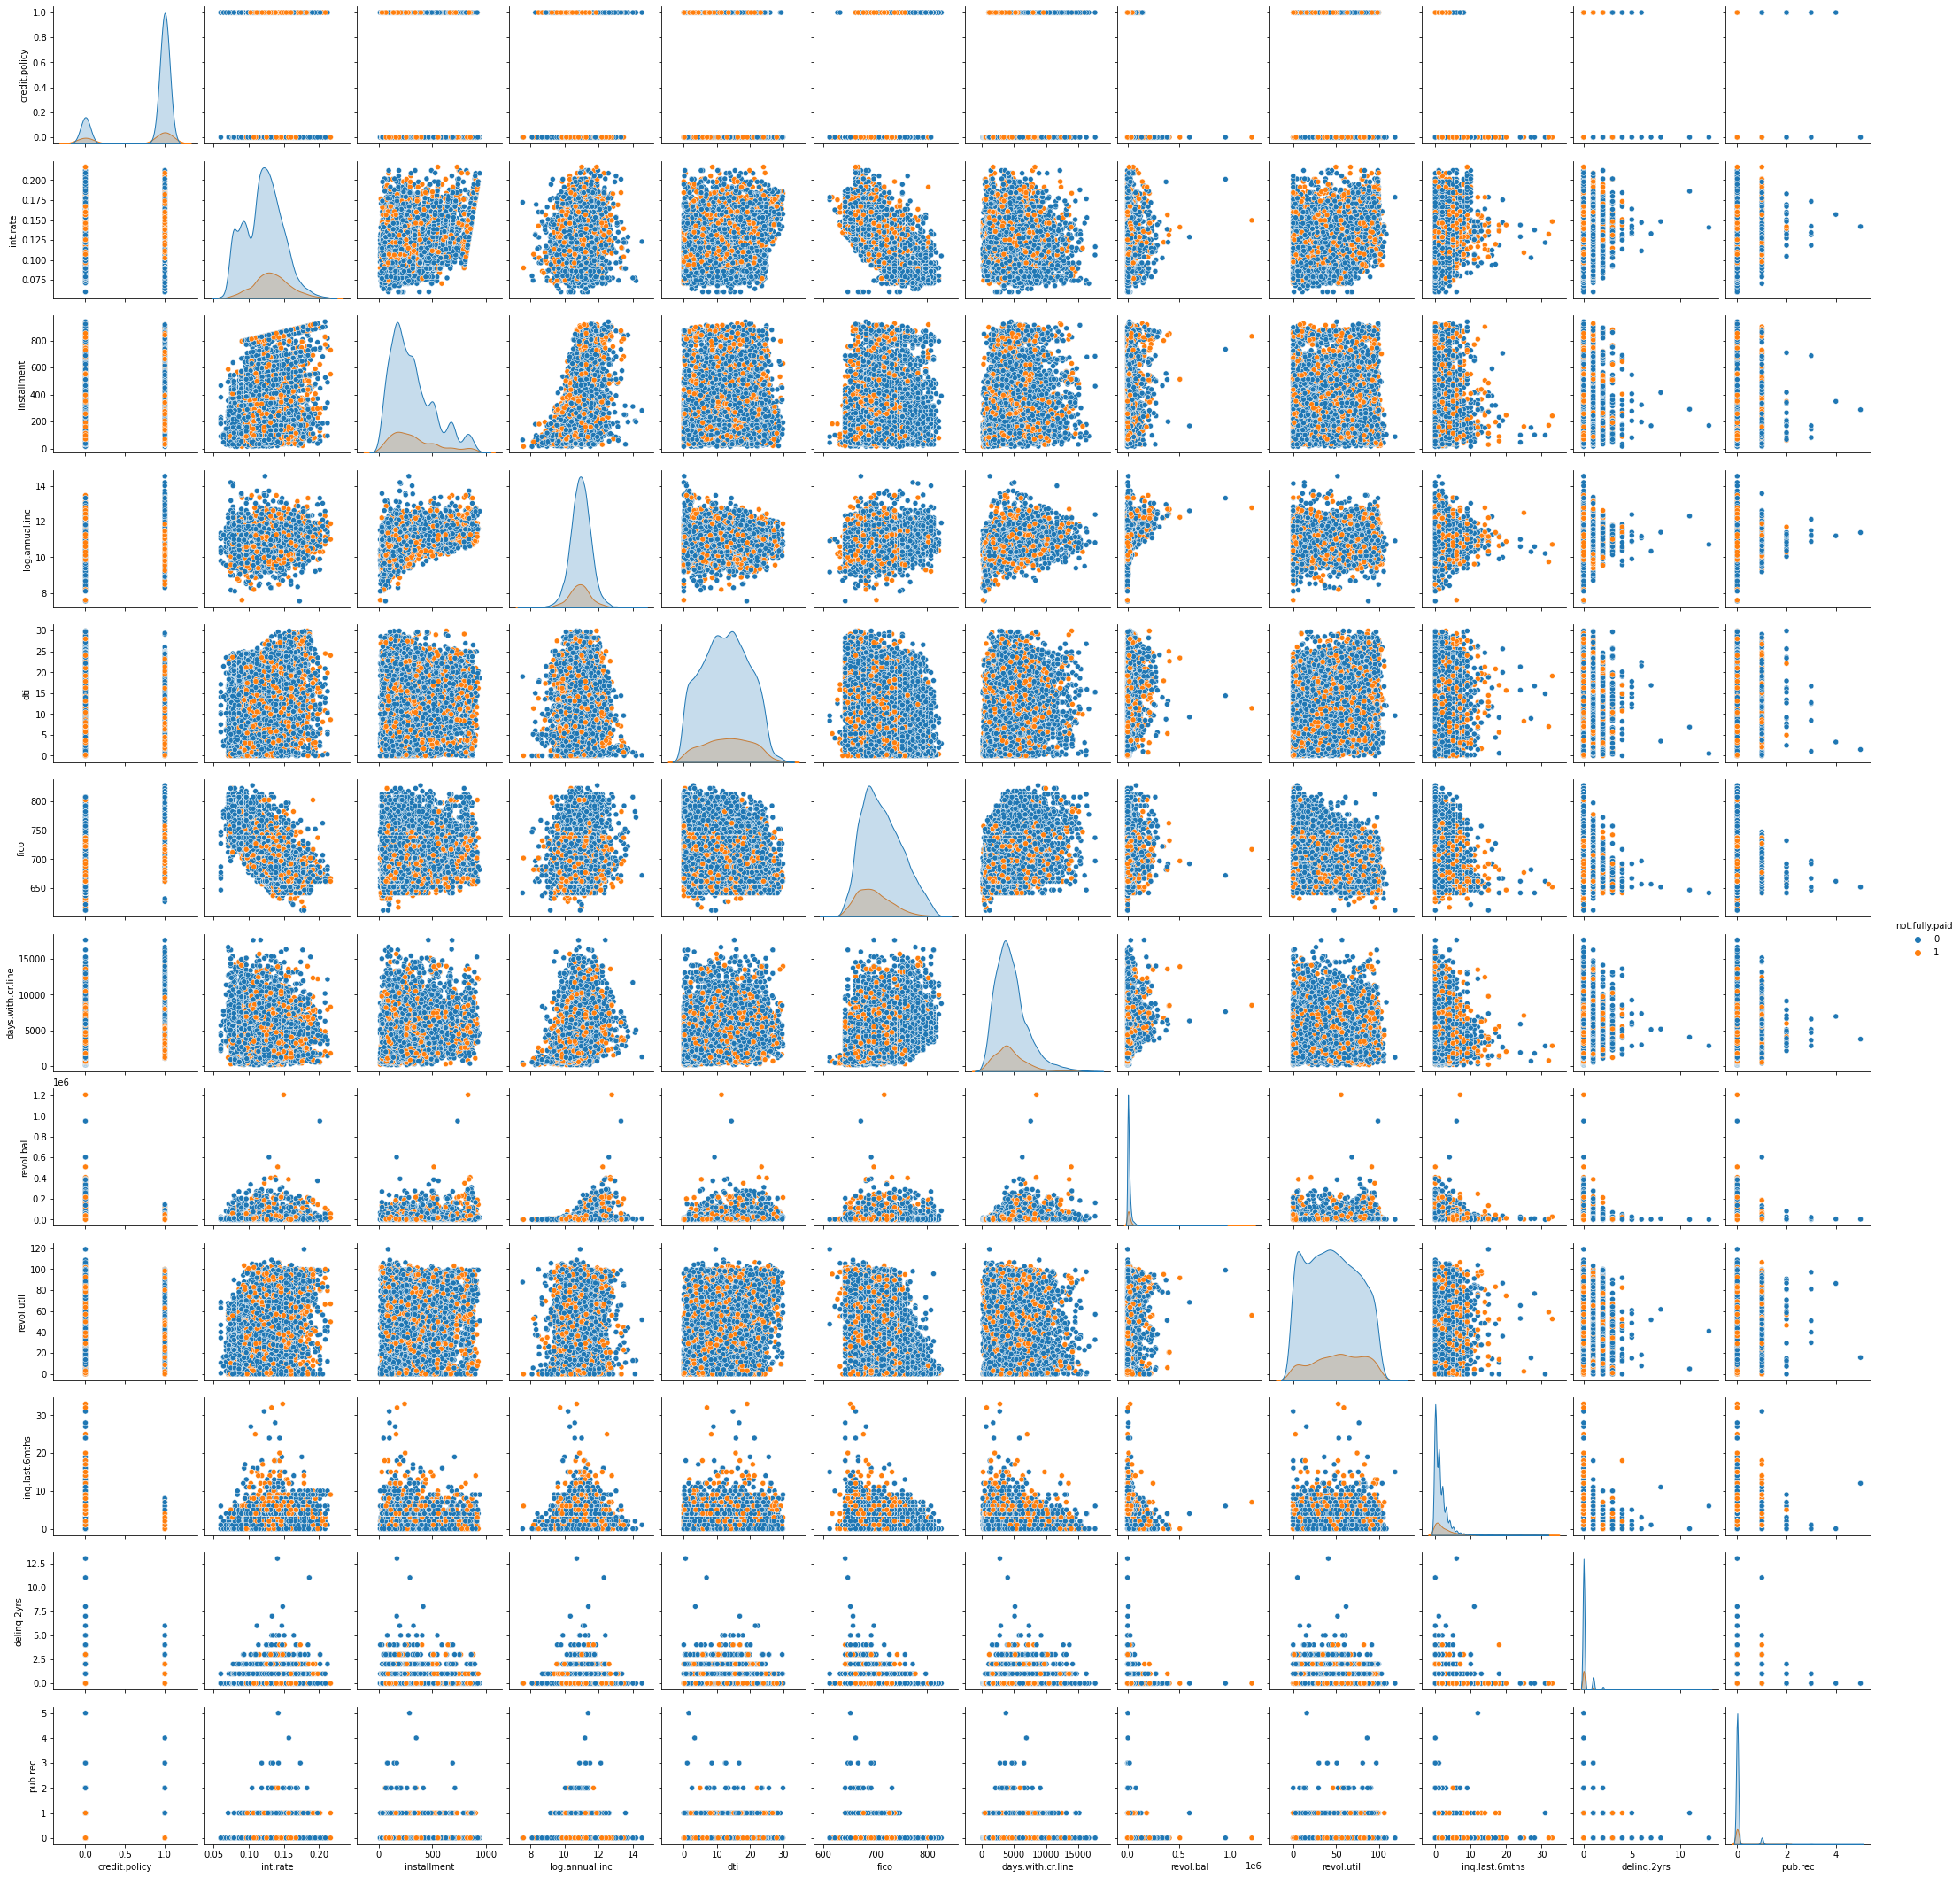

In [54]:
sns.pairplot(data=loans, hue='not.fully.paid')

The relationships shown by the pairplot are not indicative of any obvious feature that could determine the outcome. Let's explore the data more carefully.

We start with an histogram of the two FICO credit score distributions, one for each `credit.policy` (whether or not the borrower meets the credit underwritting criteria) value.

<AxesSubplot:xlabel='fico', ylabel='Count'>

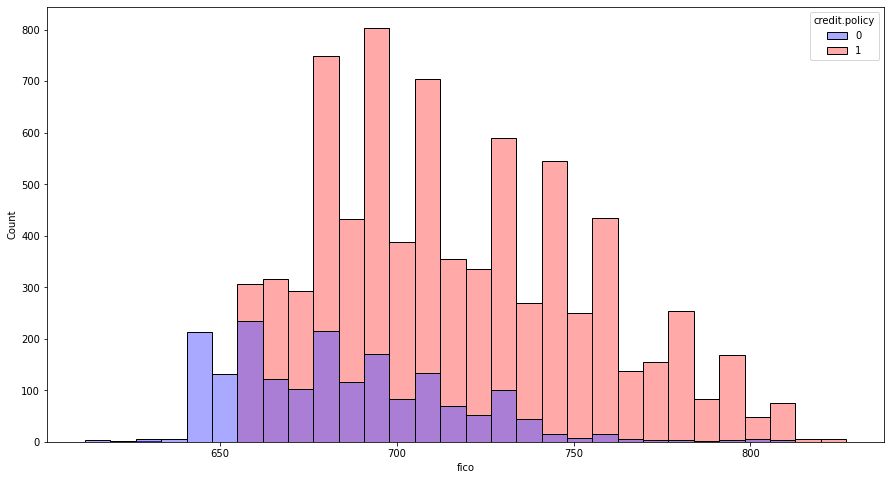

In [49]:
# Using seaborn
plt.figure(figsize=(15,8)) # set plot size using pyplot
sns.histplot(data=loans, x='fico', bins=30, hue='credit.policy', palette='seismic')

Text(0.5, 0, 'FICO')

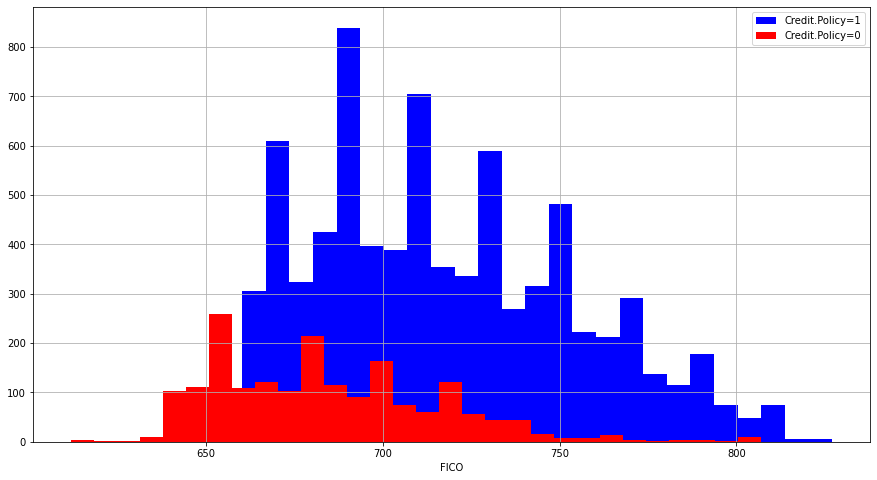

In [44]:
# Alternatively, using pure pyplot:
plt.figure(figsize=(15,8)) # set plot size using pyplot
loans[loans['credit.policy']==1]['fico'].hist(color='blue', label='Credit.Policy=1', bins=30)
loans[loans['credit.policy']==0]['fico'].hist(color='red', label='Credit.Policy=0', bins=30)
plt.legend()
plt.xlabel('FICO')

Similarly, we explore the same variable, comparing the distribution of those who fully paid the loan against those who did not (`not.fully.paid`):

<AxesSubplot:xlabel='fico', ylabel='Count'>

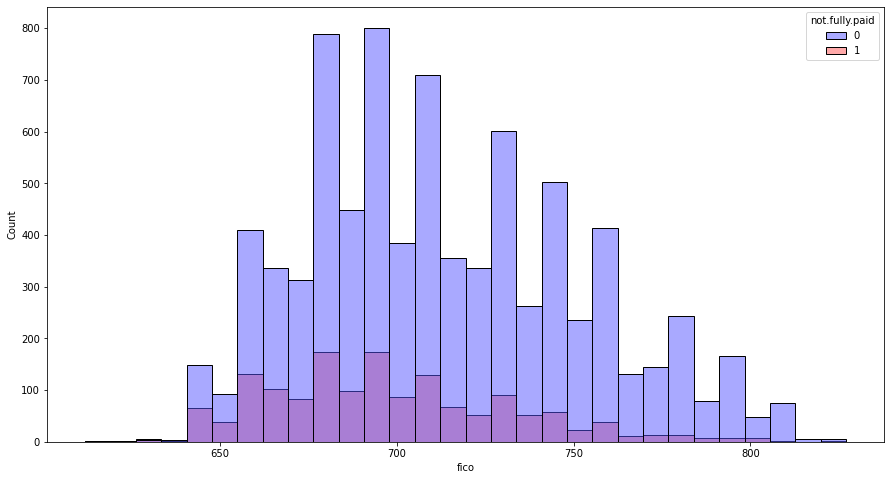

In [48]:
# Using seaborn
plt.figure(figsize=(15,8)) # set plot size using pyplot
sns.histplot(data=loans, x='fico', bins=30, hue='not.fully.paid', palette='seismic')

With a countplot, we can compare the amount of loans by purpose, hued by `not.fully.paid`.

<AxesSubplot:xlabel='purpose', ylabel='count'>

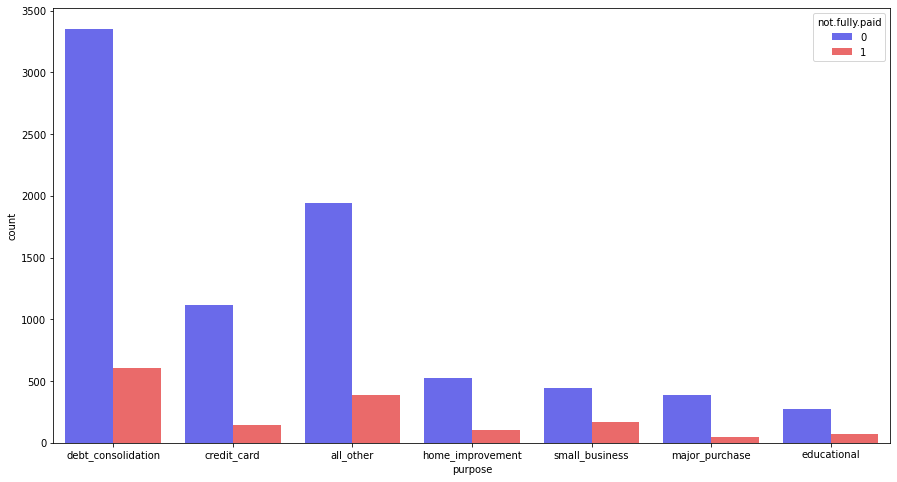

In [52]:
plt.figure(figsize=(15,8)) # set plot size using pyplot
sns.countplot(data=loans, x='purpose', hue='not.fully.paid', palette='seismic')

Using a jointplot, we can observe the trend between the FICO score and the interest rate:

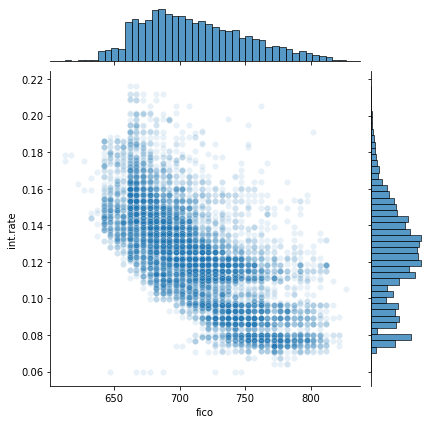

In [65]:
sns.jointplot(x='fico', y='int.rate', data=loans, alpha=0.1)

Using a lmplot we can also plot a trend line. We can hue the plot by the `credit.policy`, and also display a separate plot by `not.fully.paid`:

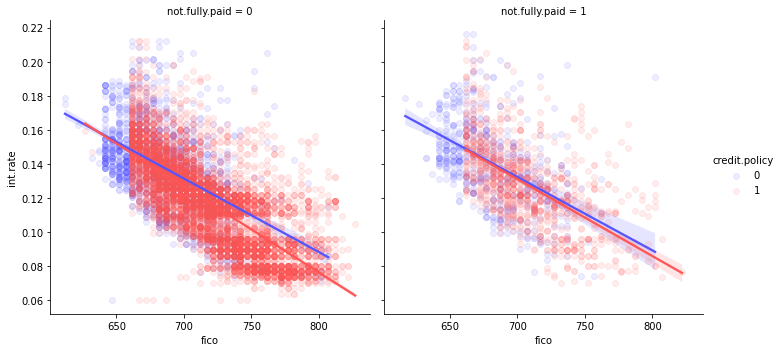

In [63]:
sns.lmplot(y='int.rate', x='fico', data=loans, hue='credit.policy', col='not.fully.paid', scatter_kws={'alpha':0.1}, palette='seismic')

# Setting up the Data

Once we have visually explored the data, let's prepare the dataset for the Random Forest model.

In [66]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


## Categorical Features

There are some categorical features (e.g. `purpose`) that we first need to convert to dummy (binary) variables, to `sklearn` can work with them. We'll use the `pd.get_dummies` function for that purpose.

We start by creating a list for the `purpose` feature, that will be saved as `cat_feats`:

In [73]:
cat_feats = ['purpose']
print(cat_feats)

['purpose']


And now, using pd.get_dummies, we create a new dataframe (`final_data`) with the *purpose* columns as dummy variables:

In [74]:
final_data = pd.get_dummies(loans, columns=cat_feats, drop_first=True)
final_data.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


## Train Test Split

We use `sklearn` to split out data into a training and a testing set, dropping the `not.fully.paid` feature, since it's the one we'll try to predict:

In [75]:
from sklearn.model_selection import train_test_split

In [76]:
X = final_data.drop('not.fully.paid', axis=1)
y = final_data['not.fully.paid']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

## Training a Decision Tree Model

First, we'll create a Decision Tree model, and we'll see how it performs compared to a Random Forest Model. We'll use the `DecisionTreeClassifier` object from sklearn.

In [77]:
from sklearn.tree import DecisionTreeClassifier

Instanciate a `DecisionTreeClassifier()` with the name `dtree`, and fit the training data:

In [78]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train,)

DecisionTreeClassifier()

## Predictions and Evaluation of Decision Tree
Once the model has been fitted, we are ready to create the predictions:

In [79]:
predictions = dtree.predict(X_test)

Create a classification report and a confusion matrix to evaluete the fitness of the model:

In [80]:
from sklearn.metrics import classification_report,confusion_matrix

In [83]:
print("Classification report:")
print(classification_report(y_test,predictions))
print("Confusion Matrix:")
print(confusion_matrix(y_test,predictions))

Classification report:
              precision    recall  f1-score   support

           0       0.85      0.82      0.83      2431
           1       0.18      0.21      0.19       443

    accuracy                           0.73      2874
   macro avg       0.51      0.51      0.51      2874
weighted avg       0.75      0.73      0.74      2874

Confusion Matrix:
[[1993  438]
 [ 350   93]]


## Training the Random Forest model

Now its time to train the Random Forest Model, using the `RandomForestClassifier` class from sklearn, and fitting the same training data we used before.

In [84]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier()

## Predictions and Evaluation

Again, it's time to predict the y_test values (`not.fully.paid`) for the test data and evaluate our model.

In [86]:
rfc_pred = rfc.predict(X_test)

**Now create a classification report from the results. Do you get anything strange or some sort of warning?**

In [88]:
print("Classification report:")
print(classification_report(y_test,rfc_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test,rfc_pred))

Classification report:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.57      0.03      0.05       443

    accuracy                           0.85      2874
   macro avg       0.71      0.51      0.48      2874
weighted avg       0.81      0.85      0.78      2874

Confusion Matrix:
[[2422    9]
 [ 431   12]]


Comparing the two confusion matrices, we can determine that the Random Forest Classifier provided a best fit for the model, correctly predicting 85% of the loan repayments.